In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("sui.csv")


In [3]:
df.columns = [col.capitalize() for col in df.columns]

In [4]:
df["gdp_for_year ($)" ].rename["Gdp_per_year ($)"]


KeyError: 'gdp_for_year ($)'

In [5]:
palabras_permitidas = ['Germany', 'Belgium', 'Croatia', 'Denmark', 'Spain', 'France', 'Ireland', 'Latvia', 'Luxembourg', 'Netherlands', 'Sweden', 'Bulgaria', 'Slovakia', 'Estonia', 'Greece', 'Malta', 'Poland', 'Czech Republic', 'Austria', 'Cyprus', 'Slovenia', 'Finland', 'Hungary', 'Italy', 'Lithuania', 'Portugal', 'Romania', 'Norway', 'Switzerland']

# Filtrar y eliminar las filas que no contengan las palabras permitidas
df_filtrado = df[df['Country'].isin(palabras_permitidas)]

In [6]:
df_filtrado

,Country,Year,Sex,Age,Suicides_no,Population,Suicides/100k pop,Country-year,Hdi for year,gdp_for_year ($),Gdp_per_capita ($),Generation
1786,Austria,1985,male,75+ years,152,156535,97.10,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
1787,Austria,1985,male,55-74 years,355,584253,60.76,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
1788,Austria,1985,male,35-54 years,515,940526,54.76,Austria1985,0.764,"69,386,774,475",9759,Silent
1789,Austria,1985,male,25-34 years,232,548783,42.28,Austria1985,0.764,"69,386,774,475",9759,Boomers
1790,Austria,1985,female,75+ years,110,339223,32.43,Austria1985,0.764,"69,386,774,475",9759,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...,...
24973,Switzerland,2015,female,55-74 years,82,922222,8.89,Switzerland2015,NaN,"679,289,166,858",86068,Boomers
24974,Switzerland,2015,female,15-24 years,20,462559,4.32,Switzerland2015,NaN,"679,289,166,858",86068,Millenials
24975,Switzerland,2015,female,25-34 years,24,577973,4.15,Switzerland2015,NaN,"679,289,166,858",86068,Millenials
24976,Switzerland,2015,female,5-14 years,2,390910,0.51,Switzerland2015,NaN,"679,289,166,858",86068,Generation Z


In [24]:
df1=df_filtrado.groupby(["Country","Year"])["Suicides_no"].sum().sort_values(ascending=False)

In [31]:
import matplotlib.pyplot as plt

In [27]:
dataframes_by_country = {}
for group, data in df1.groupby(level='Country'):
    dataframes_by_country[group] = pd.DataFrame(data).reset_index()

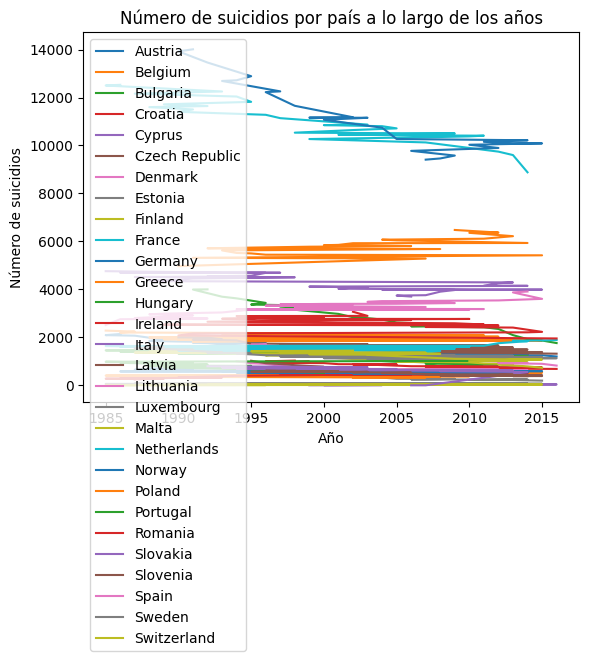

In [42]:
for country, df in dataframes_by_country.items():
    plt.plot(df["Year"], df["Suicides_no"], label=country)

# Personalizar el gráfico
plt.xlabel("Año")
plt.ylabel("Número de suicidios")
plt.title("Número de suicidios por país a lo largo de los años")
plt.legend()

# Mostrar el gráfico
plt.show()

In [30]:
dataframes_by_country['Austria']

,Country,Year,Suicides_no
0,Austria,1986,2139
1,Austria,1985,2091
2,Austria,1987,2069
3,Austria,1989,1898
4,Austria,1988,1851
5,Austria,1990,1825
6,Austria,1995,1788
7,Austria,1996,1779
8,Austria,1994,1776
9,Austria,1991,1769


In [22]:
df1 = df_filtrado.groupby(["Country", "Year"])["Suicides_no"].sum().reset_index().rename(columns={"Suicides_no": "Suma_Suicides_no"}).sort_values(by="Suma_Suicides_no", ascending=False)

In [17]:
import matplotlib.pyplot as plt

In [23]:
df1

,Country,Year,Suma_Suicides_no
260,Germany,1991,14010
259,Germany,1990,13924
261,Germany,1992,13458
264,Germany,1995,12888
263,Germany,1994,12718
...,...,...,...
478,Malta,1986,1
479,Malta,1987,1
115,Cyprus,1999,1
664,Slovakia,2007,0


In [21]:
nuevo_df

Suicides_no
Country  Year             
Germany  1991        14010
         1990        13924
         1992        13458
         1995        12888
         1994        12718
...                    ...
Malta    1986            1
         1987            1
Cyprus   1999            1
Slovakia 2007            0
         2006            0

[774 rows x 1 columns]